# Clustering

## **Pengertian Clustering**

**Clustering** adalah teknik dalam analisis data yang digunakan untuk mengelompokkan sekumpulan data menjadi beberapa kelompok (cluster) berdasarkan kemiripan atau karakteristik yang dimiliki data tersebut. Data dalam satu kelompok memiliki sifat atau pola yang mirip satu sama lain, sementara data di kelompok berbeda memiliki perbedaan yang signifikan.

Clustering sangat berguna untuk menemukan pola tersembunyi dalam data tanpa perlu label atau kategori sebelumnya (unsupervised learning). Contohnya, clustering dapat digunakan untuk mengelompokkan pelanggan berdasarkan perilaku belanja, segmentasi pasar, analisis citra, atau mengelompokkan dokumen dengan topik yang sama.

Dengan clustering, kita bisa memahami struktur data lebih baik, memudahkan pengambilan keputusan, dan membantu pengembangan strategi bisnis atau penelitian secara lebih efektif.

# **K Means**

## **Langkah-langkah Algoritma K Means**

1. Tentukan Jumlah Cluster (K)
Contoh : Dibagi menjadi 2 Cluster
2. Pilih K Centroid Awal Secara Acak Dari Data Berapa Saja.
3. Hitung Jarak Setiap data ke tiap Centroid
4. Kelompokkan data berdasarkan centroid terdekat
5. Hitung ulang centroid dari rata-rata anggota cluster
6. Ulangi langkah 3-5 hingga konvergen( tidak ada perubahan signifikan)

### **Rumus-rumus yang digunakan**

Euclidean distance

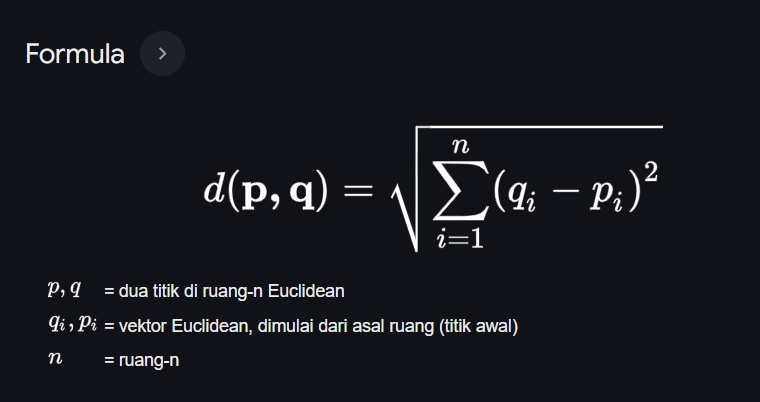

Inertia ( Sum Square Error / SSE)

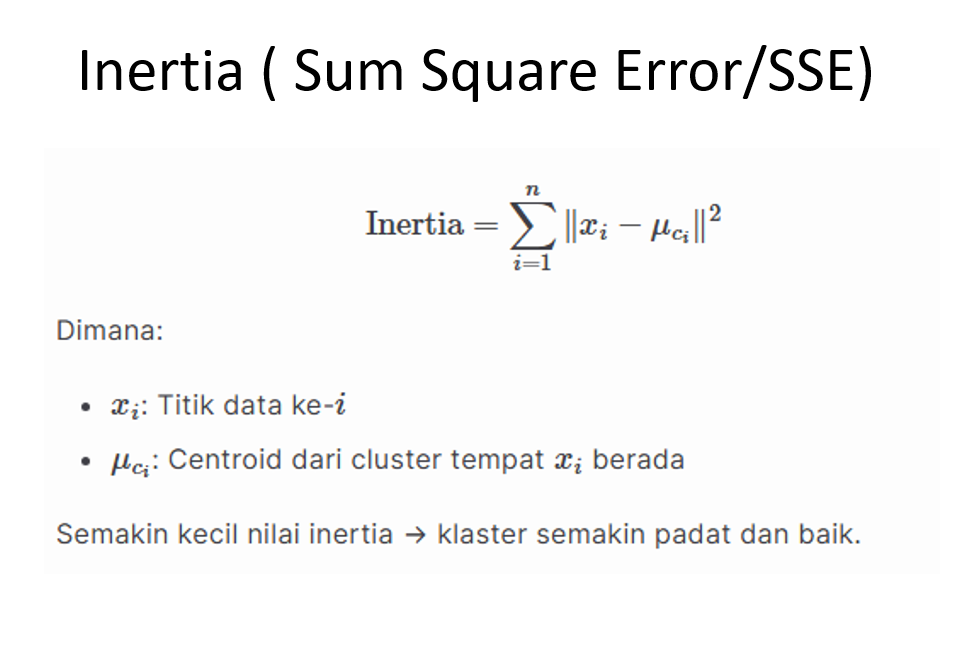

Silhouette Score

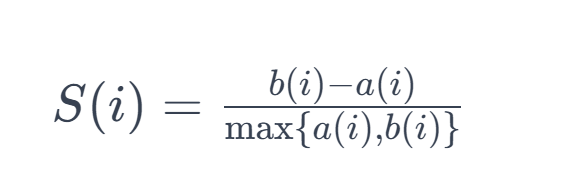

### **Mengimpor File CSV (Import Data)**

In [1]:
from google.colab import files
import pandas as pd

# Unggah file CSV
uploaded = files.upload()

# Ambil nama file yang diunggah
filename = list(uploaded.keys())[0]

# Baca file CSV dengan delimiter titik koma (;)
df = pd.read_csv(filename, delimiter=';')

Saving Iris.csv to Iris.csv


### **Menampilkan Seluruh Data dari File CSV (Display Data)**

In [2]:
from sklearn.preprocessing import StandardScaler

# Lakukan normalisasi tanpa kolom 'Id'
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Id')
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Tampilkan hasil normalisasi
print(df.head())

   Id      Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1  Iris-setosa      -0.900681      1.032057      -1.341272     -1.312977
1   2  Iris-setosa      -1.143017     -0.124958      -1.341272     -1.312977
2   3  Iris-setosa      -1.385353      0.337848      -1.398138     -1.312977
3   4  Iris-setosa      -1.506521      0.106445      -1.284407     -1.312977
4   5  Iris-setosa      -1.021849      1.263460      -1.341272     -1.312977


In [ ]:
# Menampilkan seluruh data tanpa terpotong
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Tampilkan data
display(df)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
1,2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
2,3,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
3,4,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
4,5,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977
5,6,Iris-setosa,-0.537178,1.957669,-1.170675,-1.050031
6,7,Iris-setosa,-1.506521,0.800654,-1.341272,-1.181504
7,8,Iris-setosa,-1.021849,0.800654,-1.284407,-1.312977
8,9,Iris-setosa,-1.748856,-0.356361,-1.341272,-1.312977
9,10,Iris-setosa,-1.143017,0.106445,-1.284407,-1.444450


### **Menampilkan Jumlah Baris dan Kolom**

In [ ]:
# Mendapatkan jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 150
Jumlah Kolom: 6


### **Menghapus Kolom 'Species' dan Menampilkan Data**

In [ ]:
# Menghapus kolom 'Species'
df.drop(columns=['Species'], inplace=True)

# Menampilkan data setelah kolom 'Species' dihapus
print("\nData setelah kolom 'Species' dihapus:")
display(df.head())

KeyError: "['Species'] not found in axis"

### **Visualisasi K-Means Clustering**

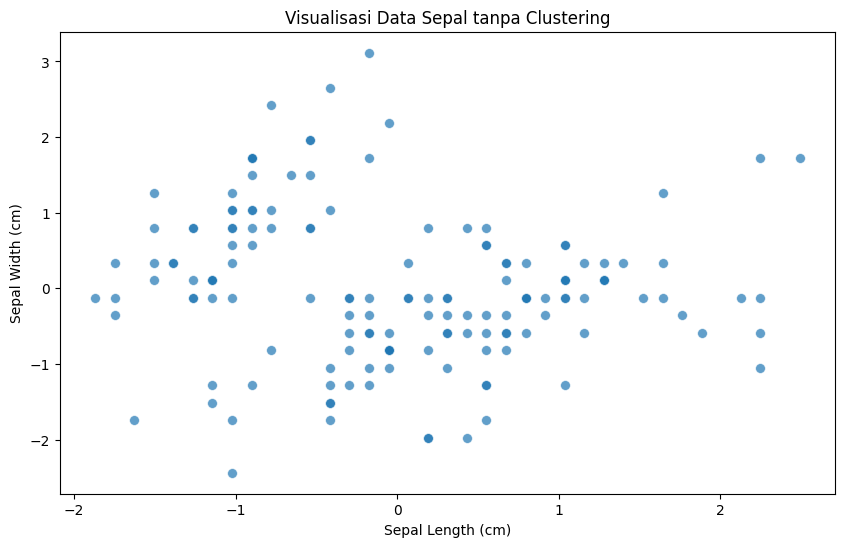

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih 2 fitur untuk visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, s=50, alpha=0.7)

plt.title("Visualisasi Data Sepal tanpa Clustering")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

### **📊 Visualisasi Data Iris Sebelum di Clustering**

<Figure size 1200x1000 with 0 Axes>

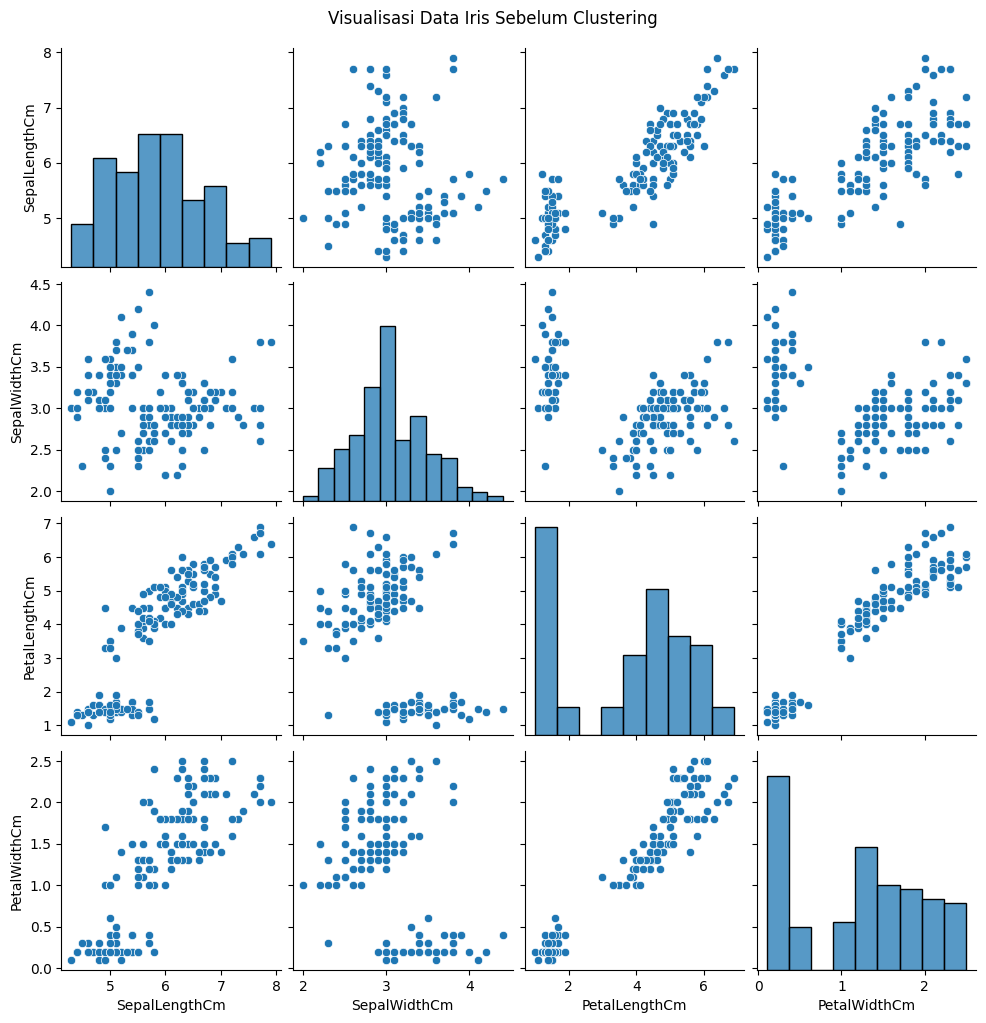

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Menambahkan kolom 'Id' untuk simulasi ID
df['Id'] = df.index + 1  # Menambahkan ID yang dimulai dari 1

# Visualisasi Pairplot sebelum Clustering
plt.figure(figsize=(12, 10))
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.suptitle("Visualisasi Data Iris Sebelum Clustering", y=1.02)
plt.show()

### **Clustering Dataset Iris dengan 2 Cluster Secara Manual**

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Inisialisasi centroid awal secara manual (2 cluster) dari data yang sudah dinormalisasi
np.random.seed(0)
centroid_indices = np.random.choice(df.index, 2, replace=False)
centroids = df.loc[centroid_indices, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Menampilkan indeks dan nilai centroid awal
print("\n🟡 Indeks Centroid Awal (Iterasi ke-0):")
for i, index in enumerate(centroid_indices):
    print(f"Centroid {i}: Data ke-{index} -> {centroids[i]}")

# Menghitung jarak Euclidean ke setiap centroid menggunakan data yang sudah dinormalisasi
distances = cdist(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values, centroids, metric='euclidean')

# Menentukan jarak terdekat dan cluster yang diikuti
df['Distance_to_Centroid_0'] = distances[:, 0]
df['Distance_to_Centroid_1'] = distances[:, 1]
df['Jarak_Terdekat'] = df[['Distance_to_Centroid_0', 'Distance_to_Centroid_1']].min(axis=1)
df['Cluster_Diikuti'] = np.where(df['Distance_to_Centroid_0'] <= df['Distance_to_Centroid_1'], 0, 1)

# Menampilkan hasil iterasi pertama dengan semua kolom, dengan kolom yang diperbarui
print("\n📝 Hasil Iterasi ke-1:")
print(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
          'Distance_to_Centroid_0', 'Distance_to_Centroid_1', 'Jarak_Terdekat', 'Cluster_Diikuti']].head(50).to_string(index=True))



🟡 Indeks Centroid Awal (Iterasi ke-0):
Centroid 0: Data ke-114 -> [5.8 2.8 5.1 2.4]
Centroid 1: Data ke-62 -> [6.  2.2 4.  1. ]

📝 Hasil Iterasi ke-1:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Distance_to_Centroid_0  Distance_to_Centroid_1  Jarak_Terdekat  Cluster_Diikuti
0             5.1           3.5            1.4           0.2                4.417013                3.146427        3.146427                1
1             4.9           3.0            1.4           0.2                4.402272                3.041381        3.041381                1
2             4.7           3.2            1.3           0.2                4.544227                3.258834        3.258834                1
3             4.6           3.1            1.5           0.2                4.396590                3.108054        3.108054                1
4             5.0           3.6            1.4           0.2                4.450843                3.218695        3.218695              

### **Clustering Dataset Iris dengan 2 Cluster Menggunakan K-Means**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Rename kolom agar sesuai
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi data
scaler = StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Inisialisasi centroid awal secara manual (2 cluster) dengan indeks random
np.random.seed(0)
centroid_indices = np.random.choice(df.index, 2, replace=False)
centroids = df.loc[centroid_indices, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Tampilkan centroid awal sesuai format
print("\n🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i}: Data ke-{idx} -> {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean().values
                              for k in range(1, 3)])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

# Tampilkan centroid akhir dengan format seperti centroid awal (tapi tanpa indeks data)
print("\n🟢 Centroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Contoh data cluster akhir
print("\n📝 Contoh data dengan cluster akhir:")
print(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Cluster_Diikuti']].head(20).to_string(index=True))


🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):
Centroid 1: Data ke-114 -> [-0.05250608 -0.59237301  0.76275827  1.58046376]
Centroid 2: Data ke-62 -> [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
Iterasi ke-1: Perubahan centroid = 2.72595279
Iterasi ke-2: Perubahan centroid = 0.69043492
Iterasi ke-3: Perubahan centroid = 0.46747656
Iterasi ke-4: Perubahan centroid = 0.17163906
Iterasi ke-5: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

🟢 Centroid Akhir:
Centroid 1: [ 0.50728948 -0.42663134  0.65249366  0.62744675]
Centroid 2: [-1.01457897  0.85326268 -1.30498732 -1.25489349]

📝 Contoh data dengan cluster akhir:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster_Diikuti
0       -0.900681      1.019004      -1.340227     -1.315444                2
1       -1.143017     -0.131979      -1.340227     -1.315444                2
2       -1.385353      0.328414      -1.397064     -1.315444                2
3       -1.506521      0.098217      -1.283389   

### **🔢 Inertia dan Silhouette Score untuk 2 Cluster**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Inisialisasi centroid (misal 3 cluster)
np.random.seed(0)
k = 2
centroid_indices = np.random.choice(df.index, k, replace=False)
centroids = df.loc[centroid_indices, features].values

max_iter = 100
tolerance = 1e-6

for i in range(max_iter):
    distances = cdist(df[features].values, centroids)
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([df[df['Cluster_Diikuti'] == cluster][features].mean().values for cluster in range(1, k+1)])
    shift = np.linalg.norm(new_centroids - centroids)
    centroids = new_centroids
    if shift < tolerance:
        break

# Sekarang panggil fungsi evaluate_clustering:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

def evaluate_clustering(df, centroids, features, cluster_col='Cluster_Diikuti'):
    inertia = 0
    for cluster in range(1, len(centroids) + 1):
        cluster_points = df[df[cluster_col] == cluster][features].values
        centroid = centroids[cluster - 1]
        inertia += np.sum((cluster_points - centroid) ** 2)

    labels_zero_based = df[cluster_col] - 1
    sil_score = silhouette_score(df[features], labels_zero_based)

    return inertia, sil_score

inertia, silhouette = evaluate_clustering(df, centroids, features)
print(f"Inertia: {inertia:.6f}")
print(f"Silhouette Score: {silhouette:.6f}")

Inertia: 222.361705
Silhouette Score: 0.581750


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Fungsi mapping cluster ke label asli dan hitung akurasi
def calculate_accuracy(y_true, clusters):
    labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, labels)

# Label asli iris
y_true = iris.target

# Label hasil cluster (ubah 1,2 jadi 0,1 untuk konsistensi)
clusters = df['Cluster_Diikuti'].values - 1

# Hitung akurasi
accuracy = calculate_accuracy(y_true, clusters)
error = 1 - accuracy

print(f"Akurasi Clustering: {accuracy:.6f}")
print(f"Error Clustering: {error:.6f}")


Akurasi Clustering: 0.666667
Error Clustering: 0.333333


### **Clustering Dataset Iris dengan 3 Cluster Menggunakan K-Means**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Rename kolom agar sesuai
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Inisialisasi centroid awal secara manual (3 cluster) dengan indeks random
np.random.seed(0)
k = 3
centroid_indices = np.random.choice(df.index, k, replace=False)
centroids = df.loc[centroid_indices, features].values

print("\n🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i}: Data ke-{idx} -> {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([
        df.loc[df['Cluster_Diikuti'] == cluster, features].mean().values
        for cluster in range(1, k+1)
    ])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\n🟢 Centroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

print("\n📝 Contoh data dengan cluster akhir:")
print(df[features + ['Cluster_Diikuti']].head(20).to_string(index=True))

# Sekarang kita hitung akurasi clustering

# Label asli dari dataset iris
true_labels = iris.target

# Label hasil clustering (dari 1..k), ubah ke 0..k-1
cluster_labels = df['Cluster_Diikuti'].values - 1

# Buat matriks kebingungan (confusion matrix)
confusion_matrix = np.zeros((k, k), dtype=int)
for i in range(k):
    for j in range(k):
        confusion_matrix[i, j] = np.sum((cluster_labels == i) & (true_labels == j))

# Cari assignment cluster ke label asli terbaik menggunakan Hungarian Algorithm
row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # maksimize

# Mapping cluster ke label asli
mapping = dict(zip(row_ind, col_ind))

# Buat array label cluster yang sudah dipetakan ke label asli
mapped_cluster_labels = np.zeros_like(cluster_labels)
for cluster_id in range(k):
    mapped_cluster_labels[cluster_labels == cluster_id] = mapping[cluster_id]

# Hitung akurasi
accuracy = accuracy_score(true_labels, mapped_cluster_labels)
print(f"\nAccuracy clustering terhadap label asli: {accuracy:.6f}")


🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):
Centroid 1: Data ke-114 -> [-0.05250608 -0.59237301  0.76275827  1.58046376]
Centroid 2: Data ke-62 -> [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
Centroid 3: Data ke-33 -> [-0.41600969  2.63038172 -1.34022653 -1.3154443 ]
Iterasi ke-1: Perubahan centroid = 2.32273311
Iterasi ke-2: Perubahan centroid = 0.28664548
Iterasi ke-3: Perubahan centroid = 0.18913586
Iterasi ke-4: Perubahan centroid = 0.13482732
Iterasi ke-5: Perubahan centroid = 0.05982289
Iterasi ke-6: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

🟢 Centroid Akhir:
Centroid 1: [1.03359865 0.00613858 0.94360463 0.9725624 ]
Centroid 2: [-0.16840578 -0.9726981   0.2598706   0.17543327]
Centroid 3: [-1.00206653  0.90625492 -1.30310821 -1.25634413]

📝 Contoh data dengan cluster akhir:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster_Diikuti
0       -0.900681      1.019004      -1.340227     -1.315444                3
1       -1.143017     -0.

### **🔢 Inertia dan Silhouette Score untuk 3 Cluster**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Inisialisasi centroid (misal 3 cluster)
np.random.seed(0)
k = 3
centroid_indices = np.random.choice(df.index, k, replace=False)
centroids = df.loc[centroid_indices, features].values

max_iter = 100
tolerance = 1e-6

for i in range(max_iter):
    distances = cdist(df[features].values, centroids)
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([df[df['Cluster_Diikuti'] == cluster][features].mean().values for cluster in range(1, k+1)])
    shift = np.linalg.norm(new_centroids - centroids)
    centroids = new_centroids
    if shift < tolerance:
        break

# Sekarang panggil fungsi evaluate_clustering:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

def evaluate_clustering(df, centroids, features, cluster_col='Cluster_Diikuti'):
    inertia = 0
    for cluster in range(1, len(centroids) + 1):
        cluster_points = df[df[cluster_col] == cluster][features].values
        centroid = centroids[cluster - 1]
        inertia += np.sum((cluster_points - centroid) ** 2)

    labels_zero_based = df[cluster_col] - 1
    sil_score = silhouette_score(df[features], labels_zero_based)

    return inertia, sil_score

inertia, silhouette = evaluate_clustering(df, centroids, features)
print(f"Inertia: {inertia:.6f}")
print(f"Silhouette Score: {silhouette:.6f}")

Inertia: 140.901532
Silhouette Score: 0.456535


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Fungsi mapping cluster ke label asli dan hitung akurasi
def calculate_accuracy(y_true, clusters):
    labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, labels)

# Label asli iris
y_true = iris.target

# Label hasil cluster (ubah 1,2 jadi 0,1 untuk konsistensi)
clusters = df['Cluster_Diikuti'].values - 1

# Hitung akurasi
accuracy = calculate_accuracy(y_true, clusters)
error = 1 - accuracy

print(f"Akurasi Clustering: {accuracy:.6f}")
print(f"Error Clustering: {error:.6f}")

Akurasi Clustering: 0.853333
Error Clustering: 0.146667


Adjusted Rand Index (ARI): 0.6451


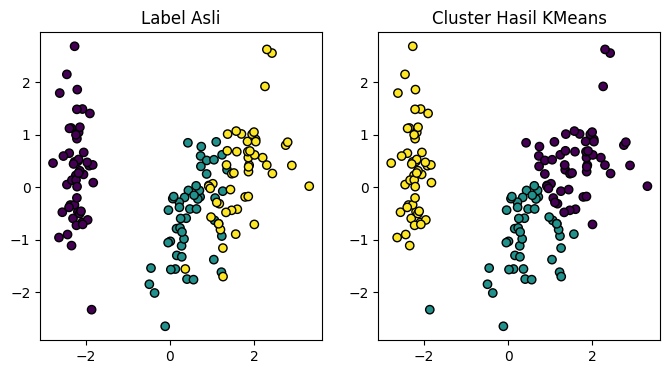

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_true, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Visualisasi 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap='viridis', marker='o', edgecolor='k')
plt.title('Label Asli')
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Cluster Hasil KMeans')
plt.show()


### **Clustering Dataset Iris dengan 4 Cluster Menggunakan K-Means**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Rename kolom agar sesuai
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Inisialisasi centroid awal secara manual (3 cluster) dengan indeks random
np.random.seed(0)
k = 4
centroid_indices = np.random.choice(df.index, k, replace=False)
centroids = df.loc[centroid_indices, features].values

print("\n🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i}: Data ke-{idx} -> {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([
        df.loc[df['Cluster_Diikuti'] == cluster, features].mean().values
        for cluster in range(1, k+1)
    ])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\n🟢 Centroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

print("\n📝 Contoh data dengan cluster akhir:")
print(df[features + ['Cluster_Diikuti']].head(20).to_string(index=True))

# Sekarang kita hitung akurasi clustering

# Label asli dari dataset iris
true_labels = iris.target

# Label hasil clustering (dari 1..k), ubah ke 0..k-1
cluster_labels = df['Cluster_Diikuti'].values - 1

# Buat matriks kebingungan (confusion matrix)
confusion_matrix = np.zeros((k, k), dtype=int)
for i in range(k):
    for j in range(k):
        confusion_matrix[i, j] = np.sum((cluster_labels == i) & (true_labels == j))

# Cari assignment cluster ke label asli terbaik menggunakan Hungarian Algorithm
row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # maksimize

# Mapping cluster ke label asli
mapping = dict(zip(row_ind, col_ind))

# Buat array label cluster yang sudah dipetakan ke label asli
mapped_cluster_labels = np.zeros_like(cluster_labels)
for cluster_id in range(k):
    mapped_cluster_labels[cluster_labels == cluster_id] = mapping[cluster_id]

# Hitung akurasi
accuracy = accuracy_score(true_labels, mapped_cluster_labels)
print(f"\nAccuracy clustering terhadap label asli: {accuracy:.6f}")


🟡 Indeks dan Nilai Centroid Awal (Iterasi ke-0):
Centroid 1: Data ke-114 -> [-0.05250608 -0.59237301  0.76275827  1.58046376]
Centroid 2: Data ke-62 -> [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
Centroid 3: Data ke-33 -> [-0.41600969  2.63038172 -1.34022653 -1.3154443 ]
Centroid 4: Data ke-107 -> [ 1.76501198 -0.36217625  1.44480739  0.79067065]
Iterasi ke-1: Perubahan centroid = 2.32136513
Iterasi ke-2: Perubahan centroid = 0.35003585
Iterasi ke-3: Perubahan centroid = 0.14884976
Iterasi ke-4: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

🟢 Centroid Akhir:
Centroid 1: [ 0.3162657  -0.42222758  0.56135608  0.52454472]
Centroid 2: [-0.42151732 -1.42945216  0.03937284 -0.05297198]
Centroid 3: [-1.00206653  0.90625492 -1.30310821 -1.25634413]
Centroid 4: [1.3280733  0.19587652 1.12617333 1.16961179]

📝 Contoh data dengan cluster akhir:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster_Diikuti
0       -0.900681      1.019004      -1.340227     -1.31

### **🔢 Inertia dan Silhouette Score untuk 4 Cluster**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Inisialisasi centroid (misal 3 cluster)
np.random.seed(0)
k = 4
centroid_indices = np.random.choice(df.index, k, replace=False)
centroids = df.loc[centroid_indices, features].values

max_iter = 100
tolerance = 1e-6

for i in range(max_iter):
    distances = cdist(df[features].values, centroids)
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1) + 1
    new_centroids = np.array([df[df['Cluster_Diikuti'] == cluster][features].mean().values for cluster in range(1, k+1)])
    shift = np.linalg.norm(new_centroids - centroids)
    centroids = new_centroids
    if shift < tolerance:
        break

# Sekarang panggil fungsi evaluate_clustering:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

def evaluate_clustering(df, centroids, features, cluster_col='Cluster_Diikuti'):
    inertia = 0
    for cluster in range(1, len(centroids) + 1):
        cluster_points = df[df[cluster_col] == cluster][features].values
        centroid = centroids[cluster - 1]
        inertia += np.sum((cluster_points - centroid) ** 2)

    labels_zero_based = df[cluster_col] - 1
    sil_score = silhouette_score(df[features], labels_zero_based)

    return inertia, sil_score

inertia, silhouette = evaluate_clustering(df, centroids, features)
print(f"Inertia: {inertia:.6f}")
print(f"Silhouette Score: {silhouette:.6f}")

Inertia: 114.626048
Silhouette Score: 0.413613


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Fungsi mapping cluster ke label asli dan hitung akurasi
def calculate_accuracy(y_true, clusters):
    labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, labels)

# Label asli iris
y_true = iris.target

# Label hasil cluster (ubah 1,2 jadi 0,1 untuk konsistensi)
clusters = df['Cluster_Diikuti'].values - 1

# Hitung akurasi
accuracy = calculate_accuracy(y_true, clusters)
error = 1 - accuracy

print(f"Akurasi Clustering: {accuracy:.6f}")
print(f"Error Clustering: {error:.6f}")

Akurasi Clustering: 0.840000
Error Clustering: 0.160000


### **Evaluasi Cluster untuk Dataset Iris dengan Inisialisasi Centroid Manual pada Metode K-Means**

Deskripsi Singkat:
Code ini melakukan clustering pada dataset Iris menggunakan metode K-Means dengan inisialisasi centroid manual untuk 2 hingga 4 cluster. Evaluasi dilakukan menggunakan Inertia dan Silhouette Score untuk menilai kualitas pembagian cluster.









In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.stats import mode

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi data
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

y_true = iris.target  # label asli

def kmeans_manual(df, k, features, max_iter=100, tolerance=1e-6):
    np.random.seed(0)
    centroid_indices = np.random.choice(df.index, k, replace=False)
    centroids = df.loc[centroid_indices, features].values

    for iteration in range(max_iter):
        distances = cdist(df[features].values, centroids, metric='euclidean')
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([
            df.loc[clusters == cluster, features].mean().values for cluster in range(k)
        ])

        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids

        if shift < tolerance:
            break
    return centroids, clusters

def evaluate_clustering(df, centroids, features, clusters, y_true):
    # Hitung inertia
    inertia = 0
    for cluster in range(len(centroids)):
        cluster_points = df[clusters == cluster][features].values
        centroid = centroids[cluster]
        inertia += np.sum((cluster_points - centroid) ** 2)

    # Hitung silhouette score
    sil_score = silhouette_score(df[features], clusters)

    # Mapping cluster ke label asli
    def map_cluster_labels(y_true, clusters):
        labels = np.zeros_like(clusters)
        for cluster in np.unique(clusters):
            mask = (clusters == cluster)
            mode_result = mode(y_true[mask])
            labels[mask] = mode_result.mode.flatten()[0]  # aman untuk scalar dan array
        return labels

    mapped_labels = map_cluster_labels(y_true, clusters)

    accuracy = accuracy_score(y_true, mapped_labels)
    error = (mapped_labels != y_true).sum()

    return inertia, sil_score, accuracy, error

# Evaluasi dari cluster 2 sampai 4
for k in range(2, 5):
    centroids, clusters = kmeans_manual(df.copy(), k, features)
    inertia, sil_score, accuracy, error = evaluate_clustering(df, centroids, features, clusters, y_true)

    print(f"\nEvaluasi untuk k = {k} cluster:")
    print(f"Inertia: {inertia:.6f}")
    print(f"Silhouette Score: {sil_score:.6f}")
    print(f"Akurasi Clustering: {accuracy:.6f}")
    print(f"Error Clustering (jumlah salah cluster): {error}")


Evaluasi untuk k = 2 cluster:
Inertia: 222.361705
Silhouette Score: 0.581750
Akurasi Clustering: 0.666667
Error Clustering (jumlah salah cluster): 50

Evaluasi untuk k = 3 cluster:
Inertia: 140.901532
Silhouette Score: 0.456535
Akurasi Clustering: 0.853333
Error Clustering (jumlah salah cluster): 22

Evaluasi untuk k = 4 cluster:
Inertia: 114.626048
Silhouette Score: 0.413613
Akurasi Clustering: 0.840000
Error Clustering (jumlah salah cluster): 24


### **🔎 Analisis Output Evaluasi Clustering:**

#### **1. Evaluasi untuk k = 2 Cluster:**

* **Inertia:** 222.361705
  Mengukur seberapa jauh titik data dalam cluster dari centroidnya. Semakin rendah, semakin baik pengelompokan. Nilai ini tinggi karena hanya ada 2 cluster untuk 3 kelas iris, sehingga banyak data yang berada jauh dari centroidnya.

* **Silhouette Score:** 0.581750
  Mengukur seberapa baik titik data dikelompokkan. Nilai mendekati 1 menunjukkan pengelompokan yang baik, mendekati 0 menunjukkan pengelompokan acak. Nilai ini cukup tinggi, menunjukkan cluster yang relatif terpisah.

* **Akurasi Clustering:** 0.666667
  Persentase data yang diklusterkan sesuai dengan label asli. Hanya 66.67% data yang sesuai, karena 2 cluster tidak cukup untuk 3 kelas iris.

* **Error Clustering:** 50
  Jumlah data yang salah klaster dari 150 total data, menunjukkan tingkat kesalahan yang cukup tinggi.

---

#### **2. Evaluasi untuk k = 3 Cluster:**

* **Inertia:** 140.901532
  Nilai inertia lebih rendah dibandingkan k=2, menunjukkan pengelompokan yang lebih baik karena lebih banyak centroid untuk menangkap variasi data.

* **Silhouette Score:** 0.456535
  Meskipun inertia menurun, silhouette score sedikit menurun, menunjukkan beberapa titik mungkin lebih sulit dikelompokkan dengan 3 cluster.

* **Akurasi Clustering:** 0.853333
  Akurasi meningkat signifikan karena jumlah cluster sesuai dengan jumlah kelas asli (Setosa, Versicolor, Virginica).

* **Error Clustering:** 22
  Jumlah kesalahan berkurang secara drastis, menunjukkan model ini lebih sesuai untuk dataset iris.

---

#### **3. Evaluasi untuk k = 4 Cluster:**

* **Inertia:** 114.626048
  Nilai inertia kembali menurun, menunjukkan pengelompokan yang lebih ketat, tetapi tidak selalu lebih akurat.

* **Silhouette Score:** 0.413613
  Menurun lebih jauh, menunjukkan beberapa titik mungkin lebih sulit dikelompokkan, mungkin karena overfitting dengan 4 cluster.

* **Akurasi Clustering:** 0.840000
  Akurasi sedikit menurun dibandingkan k=3, menunjukkan model mungkin mulai memecah cluster yang seharusnya tidak dipisahkan.

* **Error Clustering:** 24
  Jumlah kesalahan sedikit meningkat, menunjukkan beberapa titik mungkin salah diklusterkan karena jumlah cluster berlebih.

---

### **📝 Kesimpulan:**

* **k=3** adalah pilihan terbaik karena memiliki akurasi tertinggi (85.33%) dengan jumlah error yang lebih rendah (22) dan inertia yang lebih rendah dibandingkan k=2.
* Meskipun **k=4** memiliki inertia yang lebih rendah, akurasinya sedikit turun dan silhouette score lebih rendah, menunjukkan pengelompokan yang terlalu spesifik (overfitting).


### **📊 Visualisasi Inertia dan Silhouette Score**

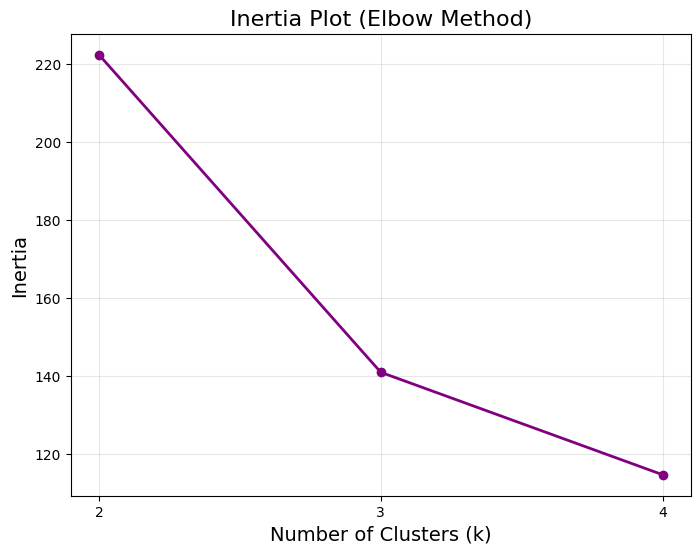

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi data
scaler = StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Fungsi k-means manual
def kmeans_manual(df, k, features, max_iter=100, tolerance=1e-6):
    np.random.seed(0)
    centroid_indices = np.random.choice(df.index, k, replace=False)
    centroids = df.loc[centroid_indices, features].values

    for iteration in range(max_iter):
        distances = cdist(df[features].values, centroids, metric='euclidean')
        clusters = np.argmin(distances, axis=1) + 1
        new_centroids = np.array([df[features][clusters == cluster].mean().values for cluster in range(1, k+1)])
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tolerance:
            break

    return centroids, clusters

# Hitung inertia untuk k = 2 sampai k = 4
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
inertias = []

for k in range(2, 5):
    centroids, clusters = kmeans_manual(df.copy(), k, features)
    inertia = 0
    for cluster in range(1, k+1):
        cluster_points = df[features][clusters == cluster].values
        centroid = centroids[cluster - 1]
        inertia += np.sum((cluster_points - centroid) ** 2)
    inertias.append(inertia)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 5), inertias, marker='o', color='purple', linewidth=2)
plt.title('Inertia Plot (Elbow Method)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(range(2, 5))
plt.grid(True, alpha=0.3)
plt.show()

Berikut penjelasan untuk **kesimpulan** dari gambar Elbow Plot tersebut:

---

### **Kesimpulan: Jumlah klaster optimal adalah 3**

#### Penjelasan:

1. **Tujuan Clustering**:
   Dalam K-Means Clustering, kita ingin membagi data ke dalam kelompok (klaster) yang saling mirip di dalamnya, dan berbeda antar kelompok. Tapi kita tidak selalu tahu berapa banyak kelompok yang tepat, jadi kita mencoba beberapa nilai *k* (jumlah klaster) dan mengevaluasi kualitasnya.

2. **Apa itu Inertia**:
   Inertia adalah ukuran seberapa tersebar data dalam klaster. Nilai inertia yang lebih kecil menunjukkan bahwa data lebih rapat terhadap pusat klasternya, yang berarti klaster tersebut lebih baik.

3. **Metode Elbow**:

   * Ketika kita menambah jumlah klaster, inertia akan **selalu turun** karena data dibagi menjadi kelompok yang lebih kecil.
   * Namun, **penurunan inertia tidak selalu signifikan**.
   * Titik di mana penurunan inertia **mulai melambat tajam** disebut "elbow" — titik ini menandakan bahwa menambah lebih banyak klaster **tidak memberi banyak keuntungan lagi**.

4. **Mengapa k=3 adalah optimal?**

   * Pada gambar, penurunan inertia dari **k=2 ke k=3** sangat besar.
   * Tapi dari **k=3 ke k=4**, penurunannya jauh lebih kecil.
   * Ini menunjukkan bahwa 3 klaster sudah cukup untuk menggambarkan struktur data, dan menambah klaster lagi tidak memberikan banyak perbaikan.

---

### Ringkasan:

Dengan menggunakan metode Elbow dan mengamati grafik inertia, kita simpulkan bahwa **jumlah klaster optimal adalah 3**, karena setelah itu penurunan inertia menjadi tidak signifikan.

# **Fuzzy C-Means**

**Fuzzy C-Means (FCM)** adalah salah satu algoritma clustering yang termasuk dalam metode *soft clustering*, di mana setiap data tidak hanya dimiliki oleh satu cluster secara mutlak, tetapi dapat menjadi anggota dari beberapa cluster dengan derajat keanggotaan (*membership degree*) tertentu antara 0 dan 1. Tujuan utama FCM adalah meminimalkan fungsi objektif yang merepresentasikan jarak berbobot antara data dan pusat cluster, dengan mempertimbangkan nilai keanggotaan fuzzy dari setiap data terhadap setiap cluster.

### Pengertian Formal:

Fuzzy C-Means (FCM) mengelompokkan data ke dalam sejumlah cluster dengan meminimalkan fungsi objektif berikut:

$$
J_m = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m \|x_i - c_j\|^2
$$

dengan:

* $x_i$ adalah data ke-i,
* $c_j$ adalah pusat cluster ke-j,
* $u_{ij}$ adalah derajat keanggotaan dari $x_i$ terhadap cluster $j$,
* $m$ adalah parameter *fuzziness* (biasanya $m > 1$),
* $N$ adalah jumlah data,
* $C$ adalah jumlah cluster,
* $\|x_i - c_j\|$ adalah jarak Euclidean antara data dan pusat cluster.

### Langkah-langkah FCM:

1. Tentukan jumlah cluster $C$, nilai parameter *fuzziness* $m$, dan batas konvergensi.
2. Inisialisasi matriks keanggotaan $U = [u_{ij}]$ secara acak.
3. Hitung pusat cluster $c_j$ berdasarkan derajat keanggotaan.
4. Perbarui nilai $u_{ij}$ berdasarkan jarak antara data ke pusat cluster.
5. Ulangi langkah 3–4 sampai perubahan nilai $U$ sangat kecil atau mencapai batas iterasi.

---

### Referensi:

1. Bezdek, J.C. (1981). *Pattern Recognition with Fuzzy Objective Function Algorithms*. Springer.
2. Duda, R. O., Hart, P. E., & Stork, D. G. (2001). *Pattern Classification* (2nd ed.). Wiley-Interscience.
3. Pham, D. L., Xu, C., & Prince, J. L. (2000). "Current methods in medical image segmentation." *Annual Review of Biomedical Engineering*, 2(1), 315–337. DOI: [10.1146/annurev.bioeng.2.1.315](https://doi.org/10.1146/annurev.bioeng.2.1.315)


## **Rumus update derajat keanggotaan**

Rumus **update derajat keanggotaan** $u_{ij}$ dalam algoritma **Fuzzy C-Means (FCM)** adalah sebagai berikut:

$$
u_{ij} = \frac{1}{\sum_{k=1}^{C} \left( \frac{\|x_i - c_j\|}{\|x_i - c_k\|} \right)^{\frac{2}{m-1}}}
$$

### Keterangan:

* $u_{ij}$: derajat keanggotaan data ke-$i$ terhadap cluster ke-$j$,
* $x_i$: data ke-$i$,
* $c_j$: pusat cluster ke-$j$,
* $C$: jumlah cluster,
* $m$: parameter fuzziness (biasanya $m = 2$),
* $\|x_i - c_j\|$: jarak (biasanya Euclidean) antara data $x_i$ dan pusat cluster $c_j$.

---

### Catatan:

* Semakin dekat jarak data $x_i$ ke pusat cluster $c_j$, maka nilai $u_{ij}$ akan semakin besar.
* Karena ini *soft clustering*, nilai $u_{ij}$ berada dalam rentang 0 hingga 1 dan untuk setiap data $x_i$, jumlah seluruh derajat keanggotaannya terhadap semua cluster harus bernilai 1:



## **Rumus update pusat cluster**

Rumus **update pusat cluster** $c_j$ dalam algoritma **Fuzzy C-Means (FCM)** adalah sebagai berikut:

$$
c_j = \frac{\sum_{i=1}^{N} u_{ij}^m \cdot x_i}{\sum_{i=1}^{N} u_{ij}^m}
$$

### Keterangan:

* $c_j$: pusat cluster ke-$j$,
* $x_i$: data ke-$i$,
* $u_{ij}$: derajat keanggotaan data $x_i$ terhadap cluster $j$,
* $m$: parameter *fuzziness* (biasanya $m = 2$),
* $N$: jumlah total data.

---

### Penjelasan:

* Pusat cluster dihitung sebagai rata-rata berbobot dari data, di mana bobotnya adalah derajat keanggotaan yang dipangkatkan dengan $m$.
* Semakin tinggi keanggotaan suatu data terhadap sebuah cluster, semakin besar kontribusinya terhadap posisi pusat cluster tersebut.

---

### Referensi Teori:

* Bezdek, J.C. (1981). *Pattern Recognition with Fuzzy Objective Function Algorithms*. Springer.
* Ross, T.J. (2010). *Fuzzy Logic with Engineering Applications*. Wiley.


## **Fungsi tujuan (objective function)**

Berikut adalah **fungsi tujuan (objective function)** dari algoritma **Fuzzy C-Means (FCM)**:

$$
J_m = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m \cdot \|x_i - c_j\|^2
$$

---

### Keterangan:

* $J_m$: fungsi tujuan (nilai yang akan diminimalkan),
* $N$: jumlah data,
* $C$: jumlah cluster,
* $u_{ij}$: derajat keanggotaan data ke-$i$ terhadap cluster ke-$j$,
* $m$: parameter *fuzziness* (biasanya $m > 1$, sering digunakan $m = 2$),
* $x_i$: data ke-$i$,
* $c_j$: pusat cluster ke-$j$,
* $\|x_i - c_j\|$: jarak Euclidean antara data $x_i$ dan pusat cluster $c_j$.

---

### Tujuan:

FCM bertujuan **meminimalkan** nilai $J_m$, yang berarti:

* Data dikelompokkan ke pusat cluster terdekat,
* Keanggotaan fuzzy diperhitungkan dalam pembobotan jarak,
* Solusi optimal adalah ketika pusat cluster dan derajat keanggotaan menghasilkan nilai $J_m$ minimum.

---

### Referensi:

* Bezdek, J.C. (1981). *Pattern Recognition with Fuzzy Objective Function Algorithms*. Springer.
* Ross, T. J. (2010). *Fuzzy Logic with Engineering Applications* (3rd ed.). Wiley.

### install library

In [5]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


### Implementasi Fuzzy C-Means Clustering pada Dataset Iris dengan Normalisasi dan Tampilan Matriks Keanggotaan

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Unggah file CSV
uploaded = files.upload()

# Ambil nama file yang diunggah
filename = list(uploaded.keys())[0]

# Baca file CSV dengan delimiter titik koma
df = pd.read_csv(filename, delimiter=';')

# Pilih fitur numerik (4 fitur)
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Normalisasi kolom numerik
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Konversi data ke numpy array
X = df[numeric_columns].values
N = X.shape[0]
C = 3  # Jumlah cluster 3
m = 2  # parameter fuzziness

# Inisialisasi matriks keanggotaan U secara acak dan normalisasi tiap baris
np.random.seed(42)
U = np.random.rand(N, C)
U = U / np.sum(U, axis=1, keepdims=True)

def hitung_centroid(U, X, m):
    U_m = U ** m
    numerator = U_m.T @ X
    denominator = np.sum(U_m.T, axis=1, keepdims=True)
    return numerator / denominator

def update_U(X, centroids, m):
    N = X.shape[0]
    C = centroids.shape[0]
    U_new = np.zeros((N, C))
    for i in range(N):
        for j in range(C):
            denom_sum = 0
            dist_ij = np.linalg.norm(X[i] - centroids[j]) + 1e-10
            for k in range(C):
                dist_ik = np.linalg.norm(X[i] - centroids[k]) + 1e-10
                denom_sum += (dist_ij / dist_ik) ** (2 / (m - 1))
            U_new[i, j] = 1 / denom_sum
    return U_new

def hitung_objektif(U, X, centroids, m):
    obj = 0
    for i in range(N):
        for j in range(C):
            dist = np.linalg.norm(X[i] - centroids[j])
            obj += (U[i,j] ** m) * (dist ** 2)
    return obj

tolerance = 1e-5
max_iter = 100
iteration = 0

print("Tolerance konvergensi:", tolerance, "\n")

while True:
    iteration += 1
    centroids = hitung_centroid(U, X, m)
    U_new = update_U(X, centroids, m)

    obj_val = hitung_objektif(U_new, X, centroids, m)
    norm_change = np.linalg.norm(U_new - U)

    print(f"Iterasi {iteration} - Pusat Cluster:")
    for c in range(C):
        c_coords = ", ".join(f"{centroids[c,d]:.4f}" for d in range(centroids.shape[1]))
        print(f" Cluster {c+1}: ({c_coords})")

    # Tampilkan hanya 5 baris pertama keanggotaan U supaya output ringkas
    print(f"Iterasi {iteration} - Derajat Keanggotaan (U) (5 Baris Pertama):")
    print(" Data    u1      u2      u3")
    for i in range(min(5, N)):
        print(f"{i+1:5d} ", end="")
        for c in range(C):
            print(f"{U_new[i,c]:.4f} ", end="")
        print()

    print(f"Iterasi {iteration} - Nilai Fungsi Objektif: {obj_val:.6f}")
    print(f"Iterasi {iteration} - Perubahan norma U: {norm_change:.8f}\n")

    if norm_change < tolerance or iteration >= max_iter:
        print(f"Konvergen pada iterasi ke-{iteration} dengan toleransi {tolerance}\n")
        break
    U = U_new

print("Pusat akhir (centroids):")
for c in range(C):
    c_coords = ", ".join(f"{centroids[c,d]:.4f}" for d in range(centroids.shape[1]))
    print(f"Cluster {c+1}: ({c_coords})")

print("\nMatriks Keanggotaan Akhir dan Cluster Dominan:")
print(" Data ", end="")
for col in numeric_columns:
    print(f"{col:>15} ", end="")
for c in range(C):
    print(f"   u{c+1}", end="")
print("  Cluster Dominan")

for i in range(N):
    x_vals = df.loc[i, numeric_columns].values
    cluster_dominan = np.argmax(U_new[i]) + 1
    print(f"{i+1:5d} ", end="")
    for val in x_vals:
        print(f"{val:15.4f} ", end="")
    for c in range(C):
        print(f"{U_new[i,c]:.4f} ", end="")
    print(f"              {cluster_dominan}")

Saving Iris.csv to Iris (9).csv
Tolerance konvergensi: 1e-05 

Iterasi 1 - Pusat Cluster:
 Cluster 1: (0.1802, -0.0720, 0.1483, 0.1583)
 Cluster 2: (0.0467, -0.0083, 0.0589, 0.0458)
 Cluster 3: (-0.2199, 0.1054, -0.2360, -0.2325)
Iterasi 1 - Derajat Keanggotaan (U) (5 Baris Pertama):
 Data    u1      u2      u3
    1 0.2503 0.2929 0.4567 
    2 0.2478 0.2905 0.4617 
    3 0.2504 0.2926 0.4571 
    4 0.2515 0.2936 0.4549 
    5 0.2564 0.2973 0.4463 
Iterasi 1 - Nilai Fungsi Objektif: 193.208591
Iterasi 1 - Perubahan norma U: 4.24178391

Iterasi 2 - Pusat Cluster:
 Cluster 1: (0.3230, -0.1717, 0.3693, 0.3524)
 Cluster 2: (0.0917, -0.0762, 0.1339, 0.1277)
 Cluster 3: (-0.5324, 0.3232, -0.6438, -0.6194)
Iterasi 2 - Derajat Keanggotaan (U) (5 Baris Pertama):
 Data    u1      u2      u3
    1 0.1295 0.1732 0.6973 
    2 0.1342 0.1823 0.6835 
    3 0.1343 0.1799 0.6858 
    4 0.1414 0.1892 0.6693 
    5 0.1452 0.1906 0.6642 
Iterasi 2 - Nilai Fungsi Objektif: 162.465743
Iterasi 2 - Perubahan 

### Penjelasan Kode Fuzzy C-Means Clustering

1. Import Library dan Upload File

```
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, delimiter=';')

```
* Mengimpor library yang diperlukan: numpy untuk operasi numerik, pandas untuk manipulasi data, StandardScaler untuk normalisasi data, dan files dari Google Colab untuk upload file.

* Mengupload file CSV dari lokal pengguna.

* Membaca file CSV dengan delimiter ; menjadi dataframe df.


2. Persiapan Data


```
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
X = df[numeric_columns].values
N = X.shape[0]
C = 3  # jumlah cluster
m = 2  # parameter fuzziness

```
* Memilih kolom fitur numerik untuk clustering.

* Melakukan normalisasi fitur agar memiliki mean 0 dan standar deviasi 1.

* Menyimpan data fitur ke array numpy X.

* Mendefinisikan jumlah data (N), jumlah cluster (C), dan parameter fuzziness (m) untuk FCM.


3. Inisialisasi Matriks Keanggotaan (U)

```
np.random.seed(42)
U = np.random.rand(N, C)
U = U / np.sum(U, axis=1, keepdims=True)

```
Membuat matriks keanggotaan U secara acak, berukuran (jumlah data x jumlah cluster).

Menormalisasi setiap baris agar jumlah keanggotaan per data sama dengan 1.


4. Fungsi Hitung Centroid


```
def hitung_centroid(U, X, m):
    U_m = U ** m
    numerator = U_m.T @ X
    denominator = np.sum(U_m.T, axis=1, keepdims=True)
    return numerator / denominator

```
* Menghitung pusat cluster (centroids) berdasarkan keanggotaan fuzzy dan parameter fuzziness.

* Rumus centroid fuzzy C-means: centroid adalah rata-rata tertimbang oleh keanggotaan pangkat m.


5. Fungsi Update Matriks Keanggotaan



```
def update_U(X, centroids, m):
    N = X.shape[0]
    C = centroids.shape[0]
    U_new = np.zeros((N, C))
    for i in range(N):
        for j in range(C):
            denom_sum = 0
            dist_ij = np.linalg.norm(X[i] - centroids[j]) + 1e-10
            for k in range(C):
                dist_ik = np.linalg.norm(X[i] - centroids[k]) + 1e-10
                denom_sum += (dist_ij / dist_ik) ** (2 / (m - 1))
            U_new[i, j] = 1 / denom_sum
    return U_new

```

* Memperbarui derajat keanggotaan tiap data ke masing-masing cluster berdasarkan jarak ke centroid.

* Rumus fuzzy C-means menggunakan rasio jarak pangkat tertentu.

6. Fungsi Hitung Fungsi Objektif


```
def hitung_objektif(U, X, centroids, m):
    obj = 0
    for i in range(N):
        for j in range(C):
            dist = np.linalg.norm(X[i] - centroids[j])
            obj += (U[i,j] ** m) * (dist ** 2)
    return obj

```
* Menghitung nilai fungsi objektif untuk evaluasi konvergensi.

* Fungsi objektif fuzzy C-means mengukur total jarak berbobot.


7. Loop Iterasi Clustering

```
tolerance = 1e-5
max_iter = 100
iteration = 0

while True:
    iteration += 1
    centroids = hitung_centroid(U, X, m)
    U_new = update_U(X, centroids, m)
    
    obj_val = hitung_objektif(U_new, X, centroids, m)
    norm_change = np.linalg.norm(U_new - U)
    
    # Tampilkan hasil tiap iterasi
    ...
    
    if norm_change < tolerance or iteration >= max_iter:
        print(f"Konvergen pada iterasi ke-{iteration} dengan toleransi {tolerance}\n")
        break
    U = U_new

```
* Melakukan iterasi update centroid dan matriks keanggotaan.

* Mengecek perubahan matriks keanggotaan (norm_change) untuk menghentikan iterasi jika sudah konvergen atau mencapai iterasi maksimum.


8. Menampilkan Hasil Akhir

```
print("Pusat akhir (centroids):")
...

print("\nMatriks Keanggotaan Akhir dan Cluster Dominan:")
...

```
* Menampilkan koordinat centroid akhir.

* Menampilkan matriks keanggotaan fuzzy akhir per data.

* Menentukan cluster dominan tiap data berdasarkan keanggotaan tertinggi.


### Evaluasi Hasil Clustering dengan Mapping Cluster ke Label Asli dan Perhitungan Akurasi

In [31]:
# ... kode clustering sebelumnya tetap

# Asumsi kolom label asli di df bernama 'Species'

cluster_dominan = np.argmax(U_new, axis=1)

mapping = {}
for c in range(C):
    mask = (cluster_dominan == c)
    labels_c = df.loc[mask, 'Species']
    if len(labels_c) == 0:
        mapping[c] = None
    else:
        mapping[c] = labels_c.mode()[0]

print("Mapping cluster ke label asli berdasarkan majority:")
for c in range(C):
    print(f" Cluster {c}: {mapping[c]}")

hasil_cek = []
for i in range(N):
    label_asli = df.loc[i, 'Species']
    cluster_label = mapping.get(cluster_dominan[i], None)
    hasil_cek.append(label_asli == cluster_label)

jumlah_sesuai = sum(hasil_cek)
jumlah_tidak_sesuai = N - jumlah_sesuai

print(f"\nJumlah data asli: {N}")
print(f"Jumlah data cluster sesuai label asli: {jumlah_sesuai}")
print(f"Jumlah data cluster tidak sesuai label asli: {jumlah_tidak_sesuai}")

print("\nData yang tidak sesuai cluster dengan label asli:")
print(f"{'Index':>5} {'Label Asli':>15} {'Cluster Dominan':>15} {'Cluster Label':>15}")
for i in range(N):
    if not hasil_cek[i]:
        print(f"{i+1:5d} {df.loc[i, 'Species']:>15} {cluster_dominan[i]:15} {mapping.get(cluster_dominan[i], 'N/A'):>15}")

# Hitung akurasi dan error akurasi
akurasi = jumlah_sesuai / N
error_akurasi = 1 - akurasi

print(f"\nAkurasi clustering: {akurasi:.4f} ({akurasi*100:.2f}%)")
print(f"Error akurasi clustering: {error_akurasi:.4f} ({error_akurasi*100:.2f}%)")

Mapping cluster ke label asli berdasarkan majority:
 Cluster 0: Iris-virginica
 Cluster 1: Iris-versicolor
 Cluster 2: Iris-setosa

Jumlah data asli: 150
Jumlah data cluster sesuai label asli: 126
Jumlah data cluster tidak sesuai label asli: 24

Data yang tidak sesuai cluster dengan label asli:
Index      Label Asli Cluster Dominan   Cluster Label
   51 Iris-versicolor               0  Iris-virginica
   52 Iris-versicolor               0  Iris-virginica
   53 Iris-versicolor               0  Iris-virginica
   57 Iris-versicolor               0  Iris-virginica
   66 Iris-versicolor               0  Iris-virginica
   71 Iris-versicolor               0  Iris-virginica
   76 Iris-versicolor               0  Iris-virginica
   77 Iris-versicolor               0  Iris-virginica
   78 Iris-versicolor               0  Iris-virginica
   86 Iris-versicolor               0  Iris-virginica
   87 Iris-versicolor               0  Iris-virginica
  102  Iris-virginica               1 Iris-versicolor
  

### Visualisasi Clustering 3 Cluster: PetalLengthCm vs PetalWidthCm dengan Centroid

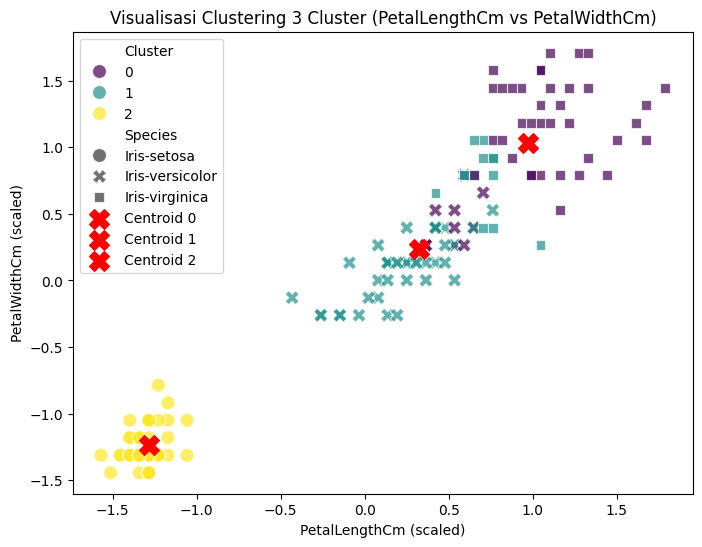

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat dataframe hasil cluster untuk visualisasi
df['Cluster'] = cluster_dominan

# Visualisasi scatter plot 2 fitur: PetalLengthCm vs PetalWidthCm
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Cluster',
    palette='viridis',
    style='Species',
    s=100,
    alpha=0.7
)

# Visualisasi centroid cluster di plot (centroids sudah ada dari clustering)
for idx, centroid in enumerate(centroids):
    plt.scatter(centroid[2], centroid[3],  # centroid kolom ke-2 dan ke-3 fitur PetalLengthCm dan PetalWidthCm
                marker='X', s=200, c='red', label=f'Centroid {idx}')

plt.title('Visualisasi Clustering 3 Cluster (PetalLengthCm vs PetalWidthCm)')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.legend()
plt.show()

### visualisasi sebelum dan sesudah clustering

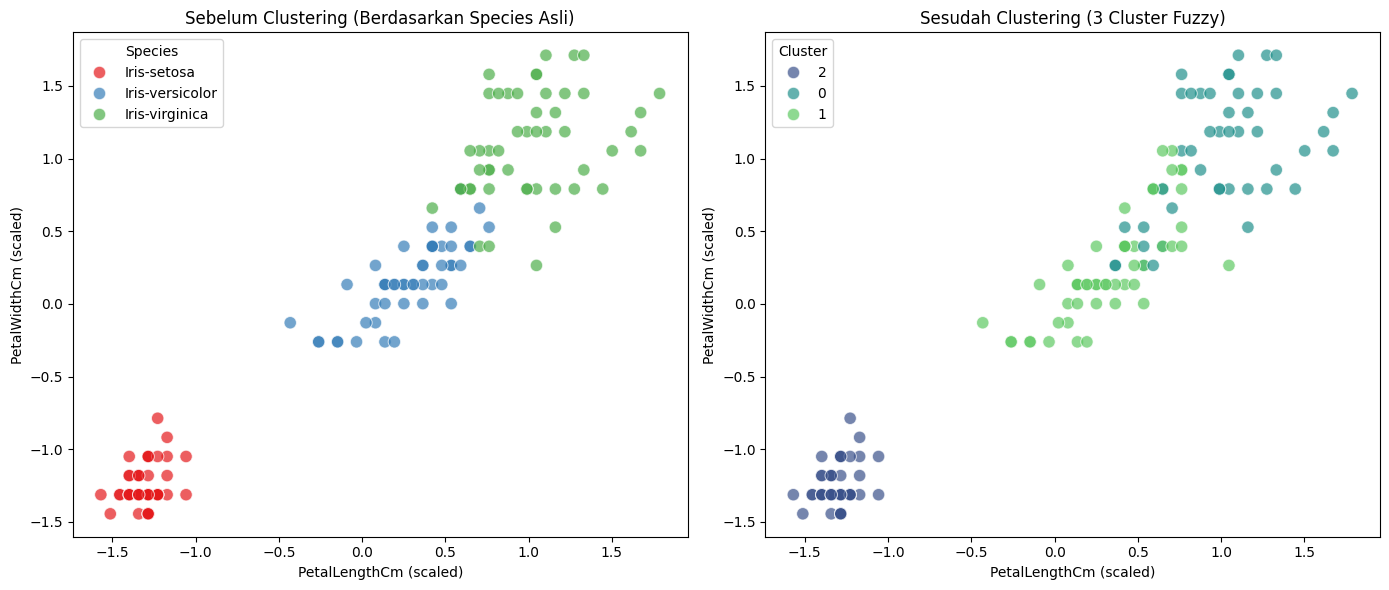

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan kolom cluster ke dataframe
df['Cluster'] = cluster_dominan.astype(str)  # agar warna ter-handle sebagai kategori string

plt.figure(figsize=(14,6))

# Visualisasi Sebelum Clustering (dengan warna berdasarkan Species asli)
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Species',
    palette='Set1',
    s=80,
    alpha=0.7
)
plt.title('Sebelum Clustering (Berdasarkan Species Asli)')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.legend(title='Species')

# Visualisasi Sesudah Clustering (berdasarkan cluster dominan)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Cluster',
    palette='viridis',
    s=80,
    alpha=0.7
)
plt.title('Sesudah Clustering (3 Cluster Fuzzy)')
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

### Pairplot dengan warna cluster dan warna label asli

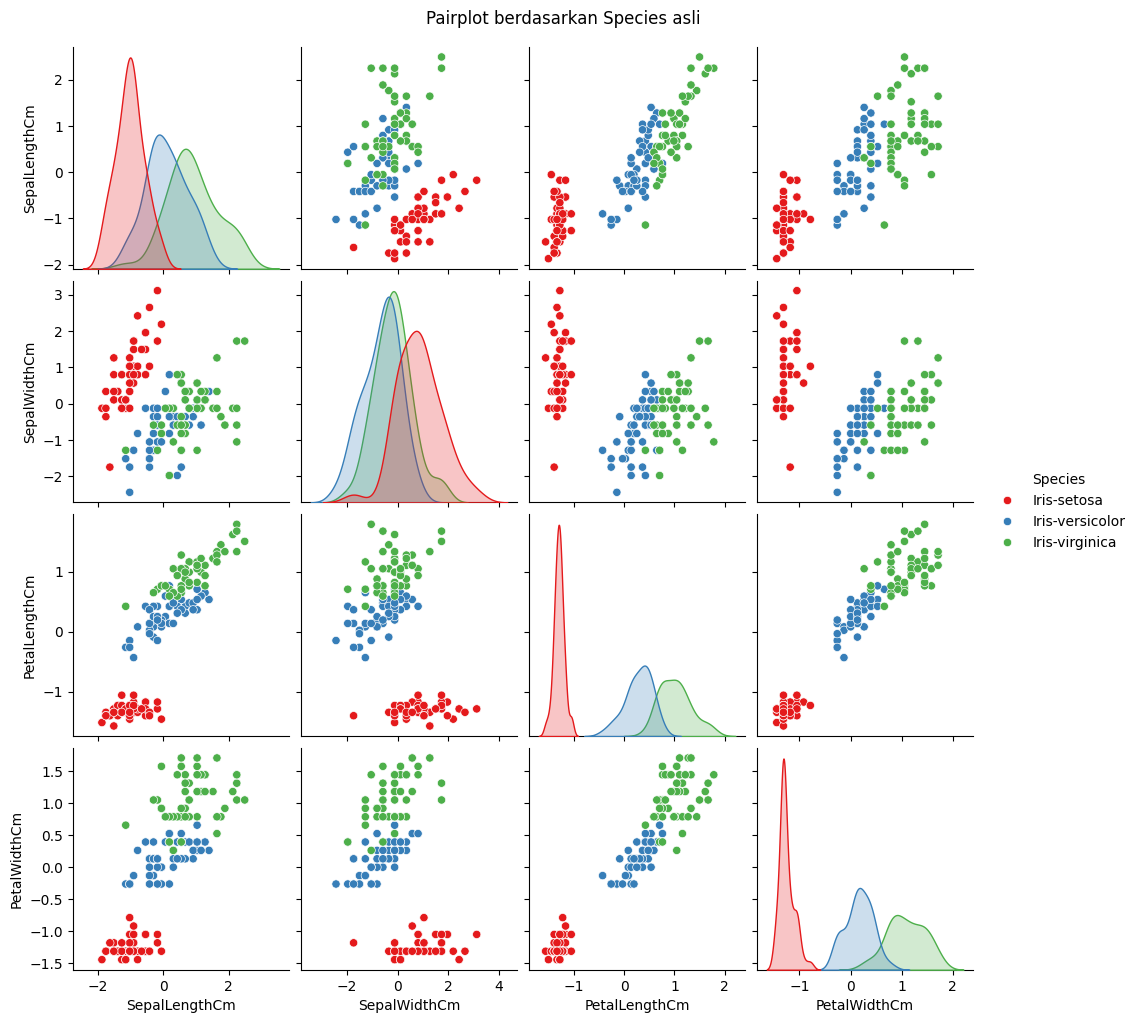

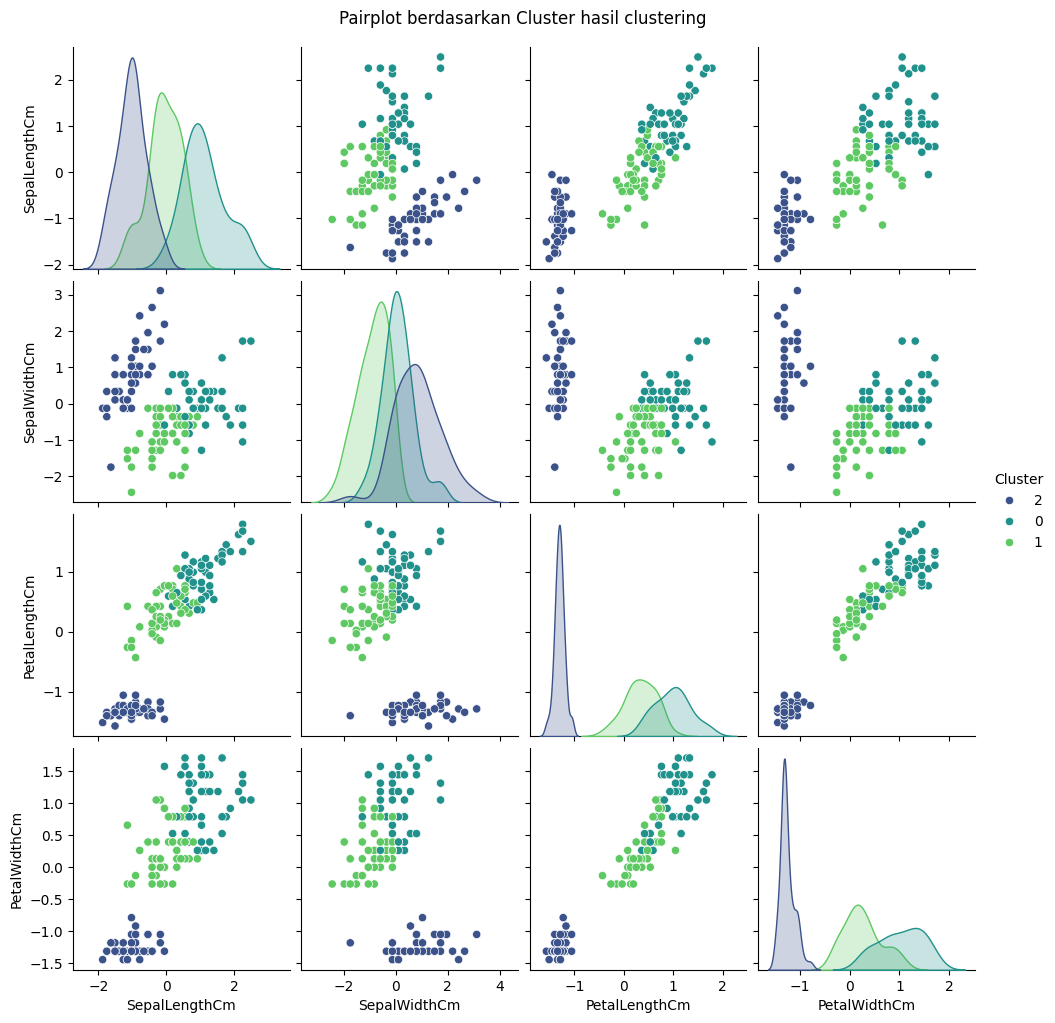

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tambahkan kolom cluster dan label asli (species) ke dataframe (kalau belum)
df['Cluster'] = cluster_dominan.astype(str)

# Pairplot berdasarkan label asli (Species)
sns.pairplot(df, vars=numeric_columns, hue='Species', palette='Set1')
plt.suptitle("Pairplot berdasarkan Species asli", y=1.02)
plt.show()

# Pairplot berdasarkan hasil clustering
sns.pairplot(df, vars=numeric_columns, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot berdasarkan Cluster hasil clustering", y=1.02)
plt.show()